# Task 2 : Exploratory Data Analysis (EDA)

## Objective: Understand data using statistics and visualizations.
## Tools:  Pandas, Matplotlib, Seaborn, Plotly
 

##### 1. Generate summary statistics (mean, median, std, etc.).
##### 2.Create histograms and boxplots for numeric features.
##### 3.Use pairplot/correlation matrix for feature relationships.
##### 4.Identify patterns, trends, or anomalies in the data. 
##### 5.Make basic feature-level inferences from visuals.


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Load Data
df = pd.read_csv("E:\\Elevate labs internship\\Titanic-Dataset.csv")


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Handle missing values (same as before)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)

In [7]:
# Convert categorical variables for analysis
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [8]:
# 1. Summary Statistics 
print("Summary Statistics:\n")
print(df.describe(include='all'))

Summary Statistics:

        PassengerId    Survived      Pclass                     Name  \
count    891.000000  891.000000  891.000000                      891   
unique          NaN         NaN         NaN                      891   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris   
freq            NaN         NaN         NaN                        1   
mean     446.000000    0.383838    2.308642                      NaN   
std      257.353842    0.486592    0.836071                      NaN   
min        1.000000    0.000000    1.000000                      NaN   
25%      223.500000    0.000000    2.000000                      NaN   
50%      446.000000    0.000000    3.000000                      NaN   
75%      668.500000    1.000000    3.000000                      NaN   
max      891.000000    1.000000    3.000000                      NaN   

               Sex         Age       SibSp       Parch  Ticket        Fare  \
count   891.000000  891.000000  891.

In [9]:
#2. Histograms and Boxplots for Numeric Features

numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']

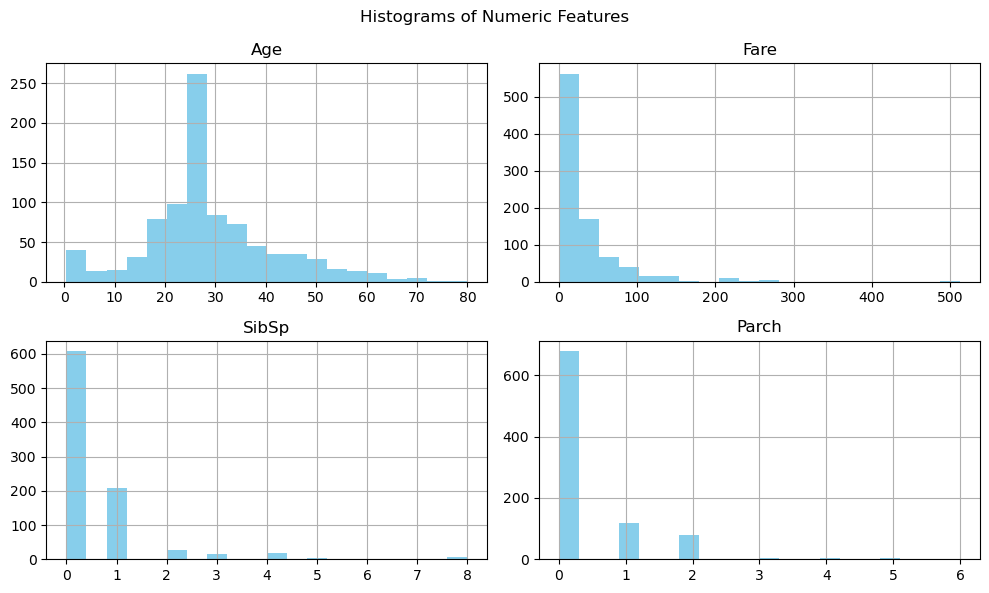

In [10]:
# Histograms
df[numeric_cols].hist(bins=20, figsize=(10, 6), layout=(2, 2), color='skyblue')
plt.suptitle('Histograms of Numeric Features')
plt.tight_layout()
plt.show()

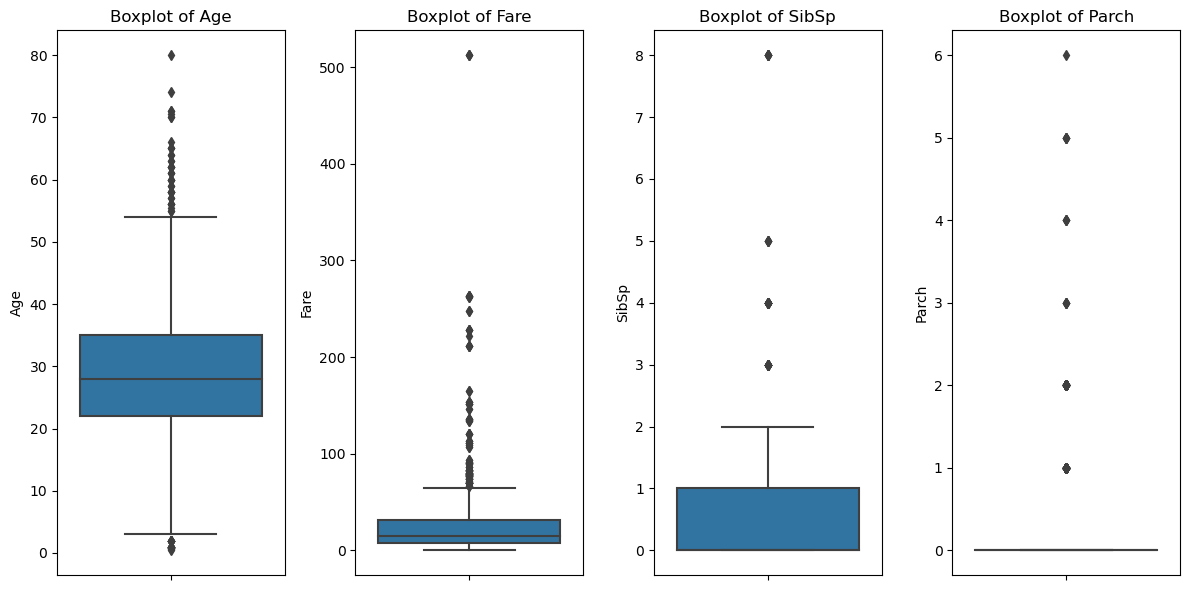

In [11]:
# Boxplots
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

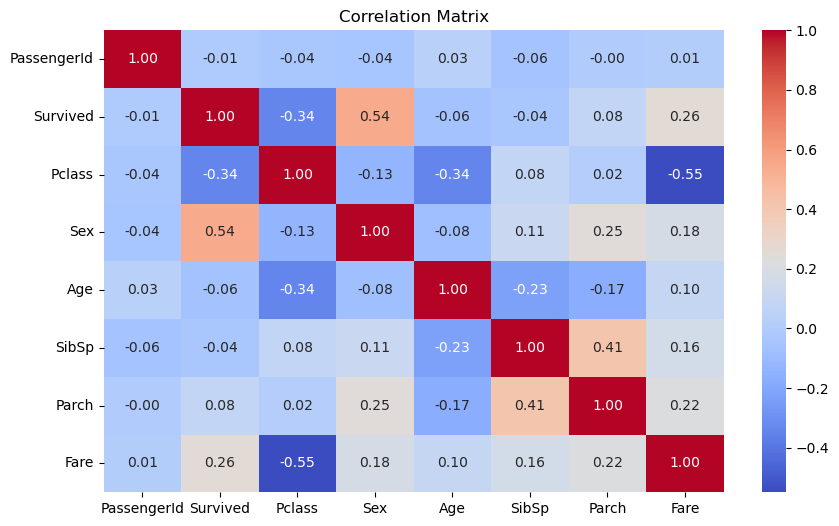

In [14]:
# 3. Pairplot and Correlation Matrix
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


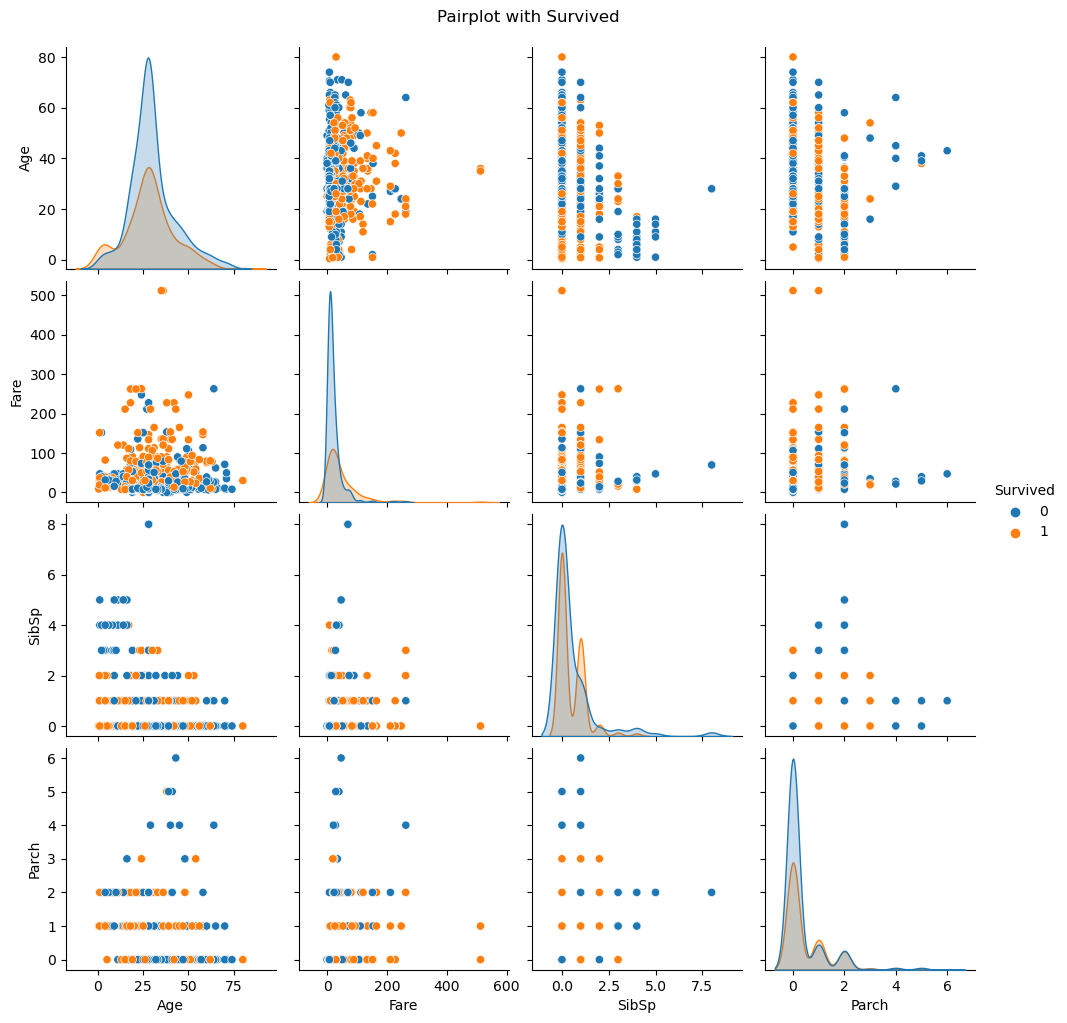

In [15]:
# Pairplot
sns.pairplot(df[numeric_cols + ['Survived']], hue='Survived')
plt.suptitle("Pairplot with Survived", y=1.02)
plt.show()

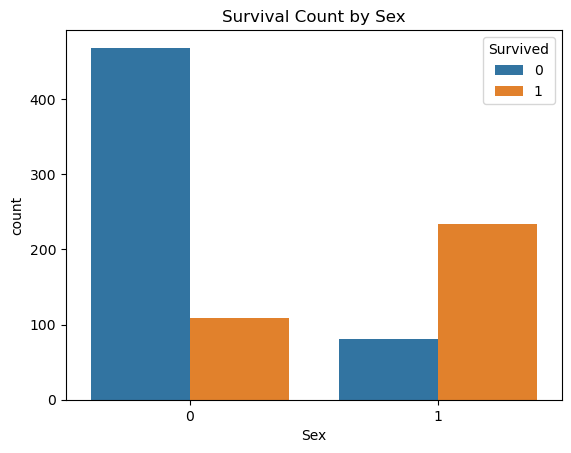

In [16]:
# 4. Identify Patterns & Anomalies

# Sex vs Survived
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival Count by Sex")
plt.show()

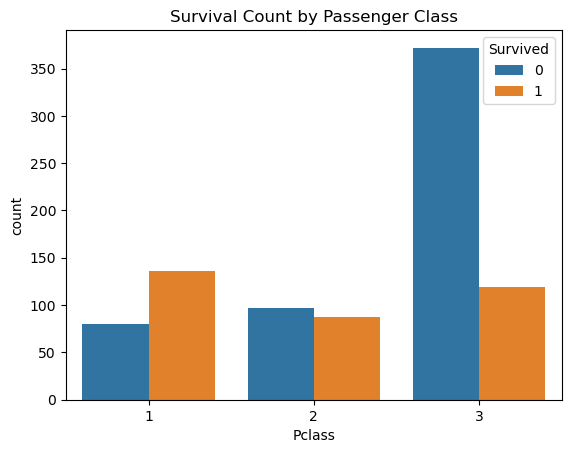

In [17]:
# Class vs Survival
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival Count by Passenger Class")
plt.show()

## Inferences from the above visuals 
#### - Females had a much higher survival rate than males.
#### - Passengers in 1st class survived more often than those in 3rd class.
#### - Age and Fare distributions are skewed with some outliers.
#### - Correlation matrix shows strong negative correlation between Sex (coded) and Survived.